In [1]:
%matplotlib notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
# import miniball
import numpy as np

import sys
sys.path.append('../')
import dyrect as dy
from dyrect import draw_complex, unit_circle_sample, EpsilonNet, NerveComplex, AlphaNerveComplex

In [2]:
np.random.seed(2)

## generate a point cloud of a shape '8'
# crc1 = unit_circle_sample(4000, 0.75) + [1.1,0]
# crc2 = unit_circle_sample(4000, 0.75) - [1.1,0]
# points = np.append(crc1, crc2, axis=0)
# eps=.25

## generate a square point cloud 
points = np.random.random((1000,2))
eps=0.1

EN = EpsilonNet(eps, 0)
EN.fit(points)
lms = EN.landmarks
# points = np.random.random((10000,2))

print("EN done")
#print(lms[14],lms[16],lms[18],lms[41])
#print(lms[0],lms[10],lms[47],lms[57])
#print(lms[30],lms[36],lms[45],lms[50])
print(lms[5],lms[30],lms[50],lms[53])

# plt.figure()
# plt.scatter(points[:,0], points[:,1])
# plt.show()

EN done
[0.88290957 0.64642207] [0.78776635 0.72424382] [0.68925187 0.64452619] [0.77257138 0.52954198]


<IPython.core.display.Javascript object>


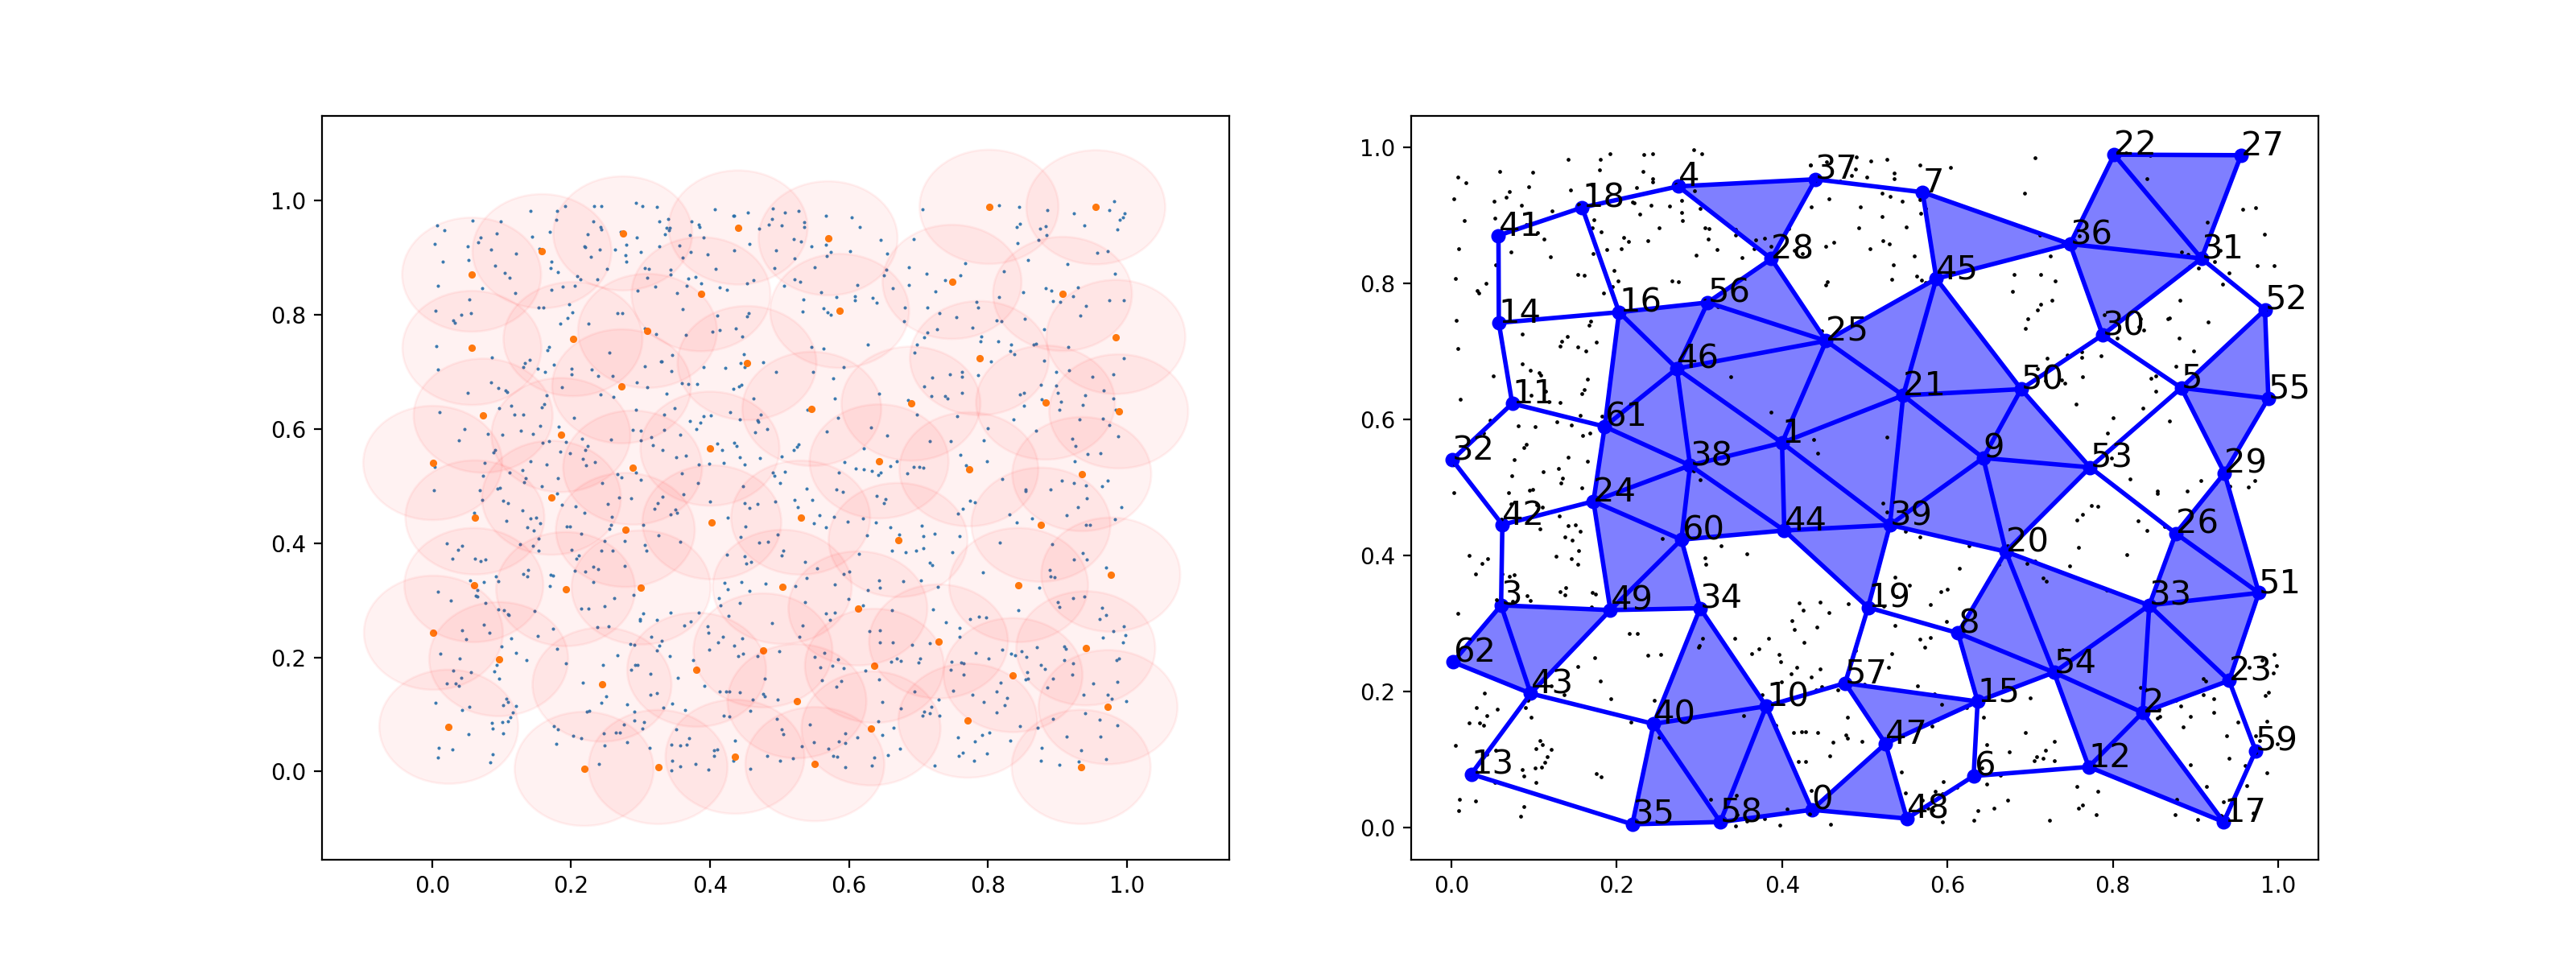

In [3]:
# fig = plt.figure(figsize=(15,10))
# fig = plt.figure()
fig = plt.figure(figsize=(16, 6))
rows = 1
cols = 2

ax = plt.subplot(rows, cols, 1)
plt.scatter(points[:,0], points[:,1], s=0.2)
plt.scatter(lms[:,0], lms[:,1], s=5.2)

for lm in lms:
    crc = plt.Circle(lm, eps, color='r', alpha=0.05)
    ax.add_patch(crc)


ax = plt.subplot(rows, cols, 2)
anc = AlphaNerveComplex(lms, eps, 2, points=points, patching=False, record_witnesses=True)
draw_complex(anc, fig=fig, ax=ax, vlabels=True)
non_witnesses = np.array([points[i, :] for i in anc.non_witnesses[2]])
# print(anc.not_witnessed[2])
ax.scatter(non_witnesses[:, 0], non_witnesses[:, 1], color='k', s = 0.5)
plt.show()

<IPython.core.display.Javascript object>


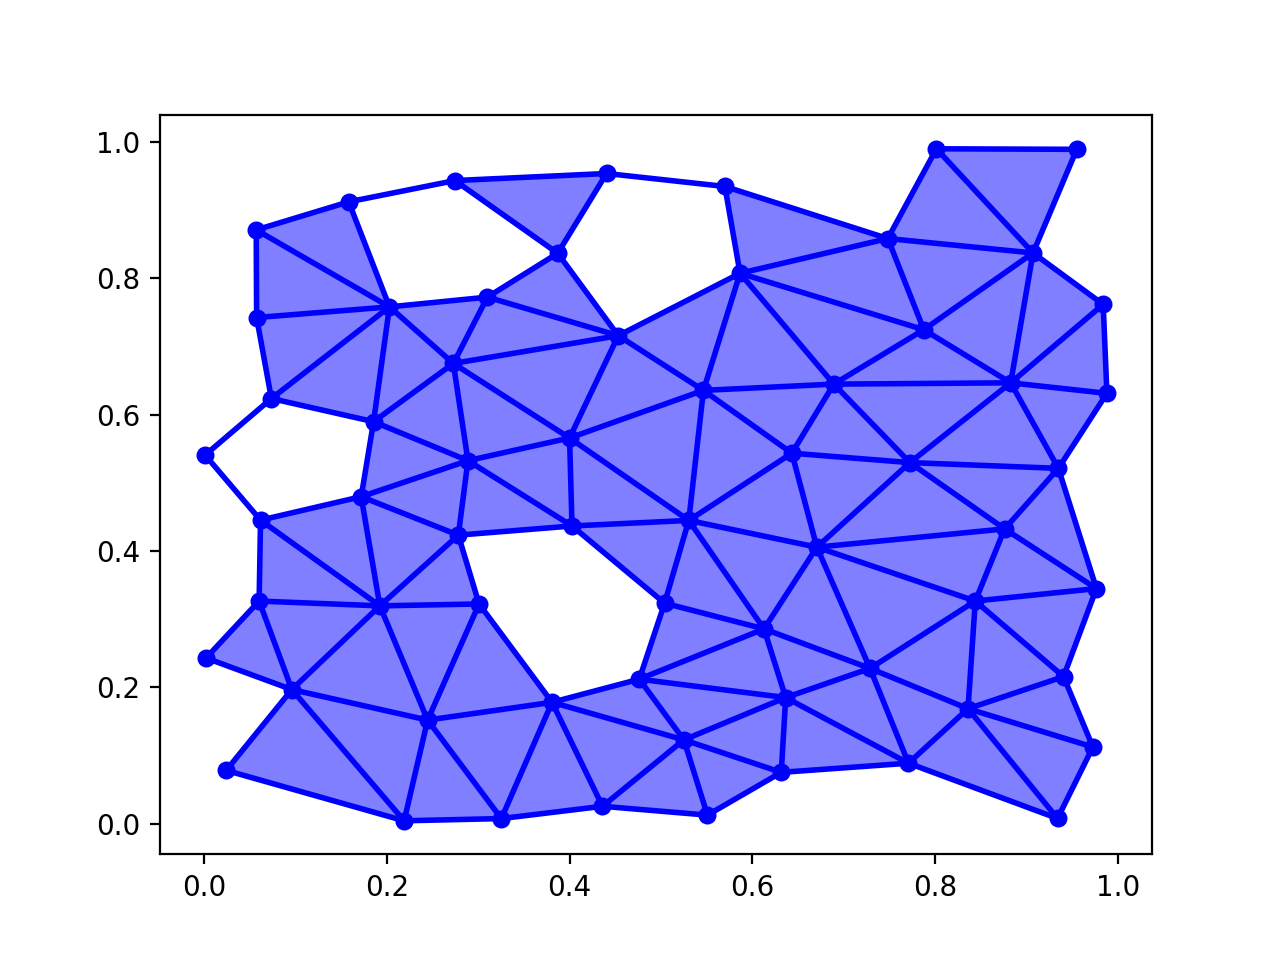

In [4]:
## patched witness
fig = plt.figure()
ax = plt.subplot()
anc2 = AlphaNerveComplex(lms, eps, 2, points=points)
draw_complex(anc2, fig=fig, ax=ax)
plt.show()